<a href="https://colab.research.google.com/github/Taeseong-eom/TOM-Cafeteria-Model/blob/main/%ED%95%99%EC%83%9D%ED%9A%8C%EA%B4%80_%EC%8B%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [260]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [263]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/명진당식수/학관 식수 예측 모델/식수.xlsx")

In [264]:
data

,날짜,학관메뉴,학관분류메뉴,평균기온,일강수량,요일,학관식수,전주 식수,요일 평균 식수,시험기간,...,종강주,시험끝목금,공휴일유무,학기번호,주말,휴일 전날,휴일 다음날,연휴 전날,연휴 다음날,매움
0,2023-03-13,목살스테이크덮밥,육류,3.0,0.0,월,482.0,NaN,522,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2023-03-14,콩나물불고기덮밥,육류,8.6,0.0,화,463.0,NaN,528,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-03-15,가츠동,돈까스,8.5,0.0,수,602.0,NaN,495,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-16,치킨마요덮밥,육류,4.5,0.0,목,496.0,NaN,435,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-03-17,햄야채볶음밥,밥류,6.4,0.0,금,180.0,NaN,218,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        429 non-null    datetime64[ns]
 1   학관메뉴      207 non-null    object        
 2   학관분류메뉴    206 non-null    object        
 3   평균기온      383 non-null    float64       
 4   일강수량      383 non-null    float64       
 5   요일        429 non-null    object        
 6   학관식수      195 non-null    float64       
 7   전주 식수     195 non-null    float64       
 8   요일 평균 식수  455 non-null    int64         
 9   시험기간      425 non-null    float64       
 10  축제유무      424 non-null    float64       
 11  간식배부      426 non-null    float64       
 12  예비군유무     425 non-null    float64       
 13  평균기온차이    383 non-null    float64       
 14  습도        383 non-null    float64       
 15  바람속도      383 non-null    float64       
 16  명진당분류메뉴   190 non-null    object        
 17  주차        287 no

In [266]:
notnulldata = data[data['학관메뉴'].notnull()]

In [267]:
data = notnulldata.drop(['날짜', '학관메뉴'], axis=1)

In [268]:
data = data[data['학관식수'].notnull()]

In [269]:
data = data[data['학관식수'] != 0]

In [270]:
# data.drop(['평균기온', '습도', '일강수량', '바람속도'], axis=1, inplace=True)
# data.drop(['평균기온차이'],axis=1,inplace=True)

In [271]:
data.drop(['평균기온', '일강수량', '간식배부', '습도', '바람속도', '평균기온차이', '습도', '바람속도', '주말', '연휴 전날'], axis=1, inplace=True)


In [272]:
# data.drop(['휴일 전날', '휴일 다음날'], axis=1, inplace=True)

In [273]:
data.dropna(inplace=True)

In [274]:
data.isnull().sum()

학관분류메뉴      0
요일          0
학관식수        0
전주 식수       0
요일 평균 식수    0
시험기간        0
축제유무        0
예비군유무       0
명진당분류메뉴     0
주차          0
방학유무        0
개강주         0
종강주         0
시험끝목금       0
공휴일유무       0
학기번호        0
휴일 전날       0
휴일 다음날      0
연휴 다음날      0
매움          0
dtype: int64

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 7 to 382
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학관분류메뉴    131 non-null    object 
 1   요일        131 non-null    object 
 2   학관식수      131 non-null    float64
 3   전주 식수     131 non-null    float64
 4   요일 평균 식수  131 non-null    int64  
 5   시험기간      131 non-null    float64
 6   축제유무      131 non-null    float64
 7   예비군유무     131 non-null    float64
 8   명진당분류메뉴   131 non-null    object 
 9   주차        131 non-null    float64
 10  방학유무      131 non-null    float64
 11  개강주       131 non-null    float64
 12  종강주       131 non-null    float64
 13  시험끝목금     131 non-null    float64
 14  공휴일유무     131 non-null    float64
 15  학기번호      131 non-null    float64
 16  휴일 전날     131 non-null    float64
 17  휴일 다음날    131 non-null    float64
 18  연휴 다음날    131 non-null    float64
 19  매움        131 non-null    float64
dtypes: float64(16), int64(1), object(3)
m

<ipython-input-276-7eace2822687>:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


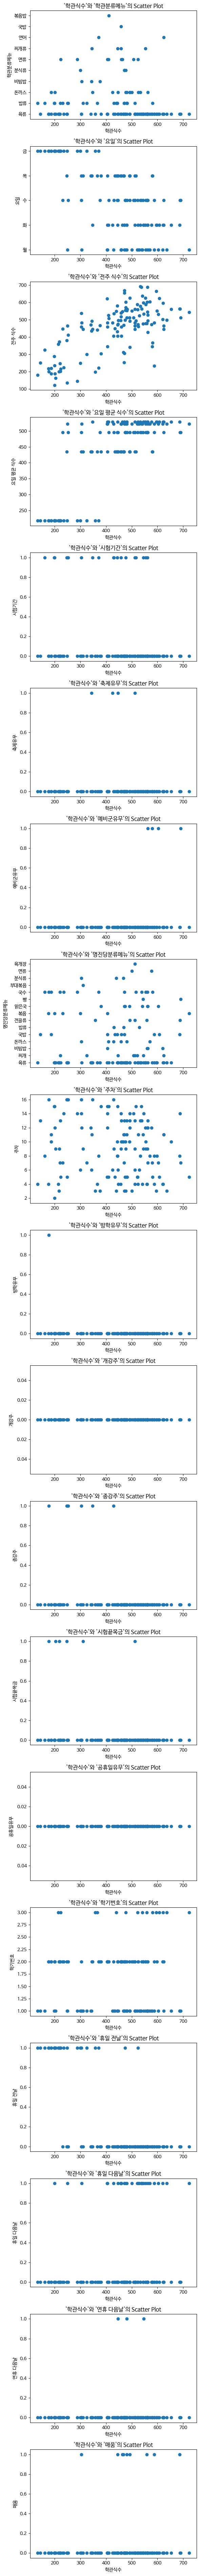

In [276]:
df = pd.DataFrame(data)

# '학관식수' 컬럼을 제외한 모든 수치형 컬럼 리스트를 생성
columns = df.columns.drop('학관식수')

# '식수' 컬럼과 다른 모든 수치형 컬럼들 간의 scatter plot 그리기
fig, ax = plt.subplots(len(columns), 1, figsize=(6, 4*len(columns)))

for i, column in enumerate(columns):
    ax[i].scatter(df['학관식수'], df[column])
    ax[i].set_title(f"'학관식수'와 '{column}'의 Scatter Plot")
    ax[i].set_xlabel('학관식수')
    ax[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [277]:
# import pandas as pd

# # 원본 데이터 복사
# cleaned_data = data.copy()

# def remove_outliers(df, column):
#     """DataFrame에서 주어진 컬럼의 이상치를 제거하는 함수"""
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # 이상치가 아닌 데이터만 필터링
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # 식수 컬럼을 제외한 모든 컬럼에 대해 반복
# for column in cleaned_data.columns:
#     if column != '학관식수':  # 식수 컬럼을 제외
#         # 각 컬럼의 유니크한 값에 대해 그룹화하고, 그룹별로 식수 컬럼의 이상치를 제거
#         cleaned_data = (cleaned_data.groupby(column)
#                                     .apply(lambda group: remove_outliers(group, '학관식수'))
#                                     .reset_index(drop=True))



# print("이상치 제거 후 데이터:")
# df = pd.DataFrame(cleaned_data)

In [278]:


# # '식수' 컬럼을 제외한 모든 수치형 컬럼 리스트를 생성
# columns = df.columns.drop('식수')

# # '식수' 컬럼과 다른 모든 수치형 컬럼들 간의 scatter plot 그리기
# fig, ax = plt.subplots(len(columns), 1, figsize=(6, 4*len(columns)))

# for i, column in enumerate(columns):
#     ax[i].scatter(df['식수'], df[column])
#     ax[i].set_title(f"'식수'와 '{column}'의 Scatter Plot")
#     ax[i].set_xlabel('식수')
#     ax[i].set_ylabel(column)

# plt.tight_layout()
# plt.show()

In [279]:
# 특정 컬럼들에 대해 빈도수가 3이하인 값들을 가진 행을 삭제하는 함수
def filter_rows_by_frequency(df, columns):
    # 각 컬럼별로 빈도수를 계산하여 조건에 맞는 값을 필터링
    for column in columns:
        # 해당 컬럼의 값별 빈도수 계산
        freq = df[column].value_counts()
        # 빈도수가 3 초과인 값들만 선택
        valid_values = freq[freq > 2].index
        # 유효한 값들만 포함되도록 데이터프레임 필터링
        df = df[df[column].isin(valid_values)]
    return df

# '주차', '학기번호', '요일', '분류메뉴', '학관분류메뉴' 컬럼에 대해 함수 적용
df = filter_rows_by_frequency(df, ['주차', '학기번호', '요일', '학관분류메뉴', '명진당분류메뉴'])

In [280]:
# # 수치형 데이터 컬럼만 선택
# numeric_cols = df.select_dtypes(include=['float64']).columns

# # 이상치를 처리할 빈 딕셔너리 생성
# outliers_dict = {}

# for col in numeric_cols:
#     # 1분위수(Q1)와 3분위수(Q3) 계산
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)

#     # IQR 계산
#     IQR = Q3 - Q1

#     # 이상치 범위를 설정 (1.5 * IQR 규칙을 사용)
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # 이상치 인덱스를 찾아낸 후 딕셔너리에 추가
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     outliers_dict[col] = outliers.index.tolist()

#     # 이상치를 중앙값으로 대체
#     median_value = df[col].median()
#     df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

# # 이상치가 처리된 데이터프레임 확인

# print(df.info())

# # 이상치 인덱스 정보 확인
# print(outliers_dict)


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 7 to 382
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학관분류메뉴    120 non-null    object 
 1   요일        120 non-null    object 
 2   학관식수      120 non-null    float64
 3   전주 식수     120 non-null    float64
 4   요일 평균 식수  120 non-null    int64  
 5   시험기간      120 non-null    float64
 6   축제유무      120 non-null    float64
 7   예비군유무     120 non-null    float64
 8   명진당분류메뉴   120 non-null    object 
 9   주차        120 non-null    float64
 10  방학유무      120 non-null    float64
 11  개강주       120 non-null    float64
 12  종강주       120 non-null    float64
 13  시험끝목금     120 non-null    float64
 14  공휴일유무     120 non-null    float64
 15  학기번호      120 non-null    float64
 16  휴일 전날     120 non-null    float64
 17  휴일 다음날    120 non-null    float64
 18  연휴 다음날    120 non-null    float64
 19  매움        120 non-null    float64
dtypes: float64(16), int64(1), object(3)
m

In [282]:
# columns_to_check = ['시험끝목금', '예비군유무', '연휴 다음날', '연휴 전날', '공휴일유무', '종강주', '개강주', '방학유무', '간식배부', '축제유무', '시험기간']

# # 조건에 맞는 행을 찾기 위해, 지정된 컬럼들 중 하나라도 1인 행에 대한 불리언 마스크 생성
# rows_to_remove = df[columns_to_check].any(axis=1)

# # 조건에 맞는 행을 제외하고 데이터 프레임 재구성
# df = df[~rows_to_remove]

In [283]:
# # 일단 간단하게 만들기 위해 평상시 식수만 예측할 수 있도록 가능한 모든 변수를 삭제하겠음
# df_filtered = df[(df['시험끝목금'] != 1) & (df['예비군유무'] != 1) & (df['연휴 다음날'] != 1) & (df['연휴 전날'] != 1) & (df['공휴일유무'] != 1) & (df['종강주'] != 1)& (df['개강주'] != 1)& (df['방학유무'] != 1)& (df['간식배부'] != 1)& (df['축제유무'] != 1) & (df['시험기간'] != 1) ]

# # '시험끝목금'과 '예비군유무' 컬럼을 제거합니다.
# df = df_filtered.drop(columns=['시험끝목금', '예비군유무', '연휴 다음날', '연휴 전날', '공휴일유무', '종강주', '개강주', '방학유무', '간식배부', '축제유무', '시험기간'])

In [284]:
# df.drop(['학관식수'], axis=1, inplace=True)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 7 to 382
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학관분류메뉴    120 non-null    object 
 1   요일        120 non-null    object 
 2   학관식수      120 non-null    float64
 3   전주 식수     120 non-null    float64
 4   요일 평균 식수  120 non-null    int64  
 5   시험기간      120 non-null    float64
 6   축제유무      120 non-null    float64
 7   예비군유무     120 non-null    float64
 8   명진당분류메뉴   120 non-null    object 
 9   주차        120 non-null    float64
 10  방학유무      120 non-null    float64
 11  개강주       120 non-null    float64
 12  종강주       120 non-null    float64
 13  시험끝목금     120 non-null    float64
 14  공휴일유무     120 non-null    float64
 15  학기번호      120 non-null    float64
 16  휴일 전날     120 non-null    float64
 17  휴일 다음날    120 non-null    float64
 18  연휴 다음날    120 non-null    float64
 19  매움        120 non-null    float64
dtypes: float64(16), int64(1), object(3)
m

In [286]:
df['학관분류메뉴'].unique()

array(['육류', '밥류', '돈까스', '비빔밥', '분식류', '면류', '찌개류'], dtype=object)

In [287]:
df.shape

(120, 20)

In [288]:
df.head()

,학관분류메뉴,요일,학관식수,전주 식수,요일 평균 식수,시험기간,축제유무,예비군유무,명진당분류메뉴,주차,방학유무,개강주,종강주,시험끝목금,공휴일유무,학기번호,휴일 전날,휴일 다음날,연휴 다음날,매움
7,육류,월,587.0,482.0,522,0.0,0.0,0.0,육류,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,밥류,화,512.0,463.0,528,0.0,0.0,0.0,찌개,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,육류,수,560.0,602.0,495,0.0,0.0,0.0,비빔밥,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,육류,목,448.0,496.0,435,0.0,0.0,0.0,육류,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11,밥류,금,134.0,180.0,218,0.0,0.0,0.0,육류,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [289]:
df['학관분류메뉴'].unique()

array(['육류', '밥류', '돈까스', '비빔밥', '분식류', '면류', '찌개류'], dtype=object)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 7 to 382
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학관분류메뉴    120 non-null    object 
 1   요일        120 non-null    object 
 2   학관식수      120 non-null    float64
 3   전주 식수     120 non-null    float64
 4   요일 평균 식수  120 non-null    int64  
 5   시험기간      120 non-null    float64
 6   축제유무      120 non-null    float64
 7   예비군유무     120 non-null    float64
 8   명진당분류메뉴   120 non-null    object 
 9   주차        120 non-null    float64
 10  방학유무      120 non-null    float64
 11  개강주       120 non-null    float64
 12  종강주       120 non-null    float64
 13  시험끝목금     120 non-null    float64
 14  공휴일유무     120 non-null    float64
 15  학기번호      120 non-null    float64
 16  휴일 전날     120 non-null    float64
 17  휴일 다음날    120 non-null    float64
 18  연휴 다음날    120 non-null    float64
 19  매움        120 non-null    float64
dtypes: float64(16), int64(1), object(3)
m

In [291]:
df.head(1)

,학관분류메뉴,요일,학관식수,전주 식수,요일 평균 식수,시험기간,축제유무,예비군유무,명진당분류메뉴,주차,방학유무,개강주,종강주,시험끝목금,공휴일유무,학기번호,휴일 전날,휴일 다음날,연휴 다음날,매움
7,육류,월,587.0,482.0,522,0.0,0.0,0.0,육류,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [292]:
df = pd.get_dummies(df, columns=['요일', '명진당분류메뉴', '학관분류메뉴'])

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 7 to 382
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   학관식수         120 non-null    float64
 1   전주 식수        120 non-null    float64
 2   요일 평균 식수     120 non-null    int64  
 3   시험기간         120 non-null    float64
 4   축제유무         120 non-null    float64
 5   예비군유무        120 non-null    float64
 6   주차           120 non-null    float64
 7   방학유무         120 non-null    float64
 8   개강주          120 non-null    float64
 9   종강주          120 non-null    float64
 10  시험끝목금        120 non-null    float64
 11  공휴일유무        120 non-null    float64
 12  학기번호         120 non-null    float64
 13  휴일 전날        120 non-null    float64
 14  휴일 다음날       120 non-null    float64
 15  연휴 다음날       120 non-null    float64
 16  매움           120 non-null    float64
 17  요일_금         120 non-null    bool   
 18  요일_목         120 non-null    bool   
 19  요일_수         

[]

In [294]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 수치형 컬럼 선택 (타겟 컬럼 '식수' 제외)
numeric_columns = df.select_dtypes(include=['float64']).columns.drop('학관식수')

# 스케일링 적용
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
data = df



In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 7 to 382
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   학관식수         120 non-null    float64
 1   전주 식수        120 non-null    float64
 2   요일 평균 식수     120 non-null    int64  
 3   시험기간         120 non-null    float64
 4   축제유무         120 non-null    float64
 5   예비군유무        120 non-null    float64
 6   주차           120 non-null    float64
 7   방학유무         120 non-null    float64
 8   개강주          120 non-null    float64
 9   종강주          120 non-null    float64
 10  시험끝목금        120 non-null    float64
 11  공휴일유무        120 non-null    float64
 12  학기번호         120 non-null    float64
 13  휴일 전날        120 non-null    float64
 14  휴일 다음날       120 non-null    float64
 15  연휴 다음날       120 non-null    float64
 16  매움           120 non-null    float64
 17  요일_금         120 non-null    bool   
 18  요일_목         120 non-null    bool   
 19  요일_수         

In [296]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 타겟 데이터('식수')와 특성 데이터 분리
y = data['학관식수'].values
X = data.drop('학관식수', axis=1).values


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 정의
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'GradientBoosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression()
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

    # 정답 처리 로직
    correct_predictions = np.abs(predictions - y_test) <= 50
    accuracy = np.mean(correct_predictions)
    print(f"{name} 모델 정답률 (±50): {accuracy * 100:.2f}%")

# 오차율이 가장 낮은 모델 선택
best_model = min(results, key=results.get)
print(f"가장 오차율이 낮은 모델: {best_model} (MSE: {results[best_model]:.2f})")

Lasso 모델 정답률 (±50): 58.33%
Ridge 모델 정답률 (±50): 62.50%
GradientBoosting 모델 정답률 (±50): 66.67%
Bagging 모델 정답률 (±50): 62.50%
RandomForest 모델 정답률 (±50): 70.83%
LinearRegression 모델 정답률 (±50): 45.83%
가장 오차율이 낮은 모델: Bagging (MSE: 3982.58)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 214 to 261
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   요일        104 non-null    object 
 1   전주 식수     104 non-null    float64
 2   요일 평균 식수  104 non-null    float64
 3   시험기간      104 non-null    float64
 4   축제유무      104 non-null    float64
 5   간식배부      104 non-null    float64
 6   예비군유무     104 non-null    float64
 7   분류메뉴      104 non-null    object 
 8   주차        104 non-null    float64
 9   학관분류메뉴    104 non-null    object 
 10  방학유무      104 non-null    float64
 11  개강주       104 non-null    float64
 12  종강주       104 non-null    float64
 13  시험끝목금     104 non-null    float64
 14  학관식수      104 non-null    float64
 15  공휴일유무     104 non-null    float64
 16  학기번호      104 non-null    float64
 17  휴일 전날     104 non-null    float64
 18  휴일 다음날    104 non-null    float64
 19  연휴 전날     104 non-null    float64
 20  연휴 다음날    104 non-null    float64
 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib


# 타겟 변수와 피처 분리
X = data.drop('식수', axis=1)
y = data['식수']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 컬럼과 범주형 컬럼 분리
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = ['요일', '분류메뉴', '학관분류메뉴']

# 전처리 파이프라인 생성
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Ridge 회귀 모델 파이프라인 생성
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# 모델 학습
ridge_pipeline.fit(X_train, y_train)

# 모델 저장
joblib.dump(ridge_pipeline, 'ridge_model_pipeline.joblib')

print("모델 학습 및 저장 완료!")


모델 학습 및 저장 완료!


In [ ]:
import pandas as pd

pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       62 non-null     object
 1   1       62 non-null     object
 2   2       62 non-null     object
 3   3       62 non-null     object
 4   4       62 non-null     object
 5   5       62 non-null     object
 6   6       62 non-null     object
 7   7       62 non-null     object
 8   8       62 non-null     object
 9   9       62 non-null     object
 10  10      62 non-null     object
 11  11      62 non-null     object
 12  12      62 non-null     object
 13  13      62 non-null     object
 14  14      62 non-null     object
 15  15      62 non-null     object
 16  16      62 non-null     object
 17  17      62 non-null     object
 18  18      62 non-null     object
 19  19      62 non-null     object
 20  20      62 non-null     object
 21  21      62 non-null     object
 22  22      62 non-null     obje

model = joblib.load('tam.joblib') 이렇게 쓰면 됨.

# 불러온 모델을 사용하여 예측하기
predictions = loaded_model.predict(X_new)

# 예측 결과 출력하기
print(predictions)